### Treść zadania

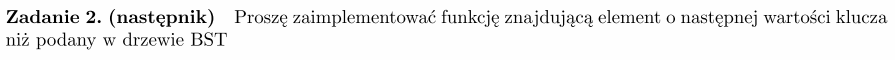

### Złożoność

###### Obliczeniowa:
$ O(h) $ - zależna od wysokości drzewa
###### Pamięciowa:
$ O(1) $

### Implementacja

In [1]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
    
    """ Kod, który jest tematem zadania, znajduje się poniżej """
    def min_child(self, node):
        while node.left:
            node = node.left
        # Return a node of the minimum key
        return node
    
    def successor(self, node):
        if node.right:
            return self.min_child(node.right)
        while node.parent:
            if node.parent.left == node:
                return node.parent
            node = node.parent
        return None

###### Kilka testów

##### Pomocnicze:

In [2]:
def insert(self, key):
    node = BSTNode(key)
    if not self.root:
        self.root = node    
    else:
        curr = self.root
        while True:
            # Enter the right subtree if a key of a value inserted is
            # greater than the key of the current BST node
            if node.key > curr.key:
                if curr.right: 
                    curr = curr.right
                else: 
                    curr.right = node
                    node.parent = curr
                    break
            # Enter the left subtree if a key of a value inserted is
            # lower than the key of the current BST node
            elif node.key < curr.key:
                if curr.left:
                    curr = curr.left
                else:
                    curr.left = node
                    node.parent = curr
                    break
            # Return False if a node with the same key already exists
            # (We won't change its value)
            else:
                return False
    # Return True if an object was successfully inserted to BST
    return True
    
    
def find(self, key):
    curr = self.root
    while curr:
        # Enter the left subtree
        if key < curr.key:
            curr = curr.left
        # Enter the right subtree
        elif key > curr.key:
            curr = curr.right
        # Return a node which was found
        else:
            return curr
    # If no node of the specified key was found, return None
    return None

BST.find = find
BST.insert = insert

def binary_tree_string(tree_root, *, fn=lambda node: node.key):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(fn(node))
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

###### Kilka testów

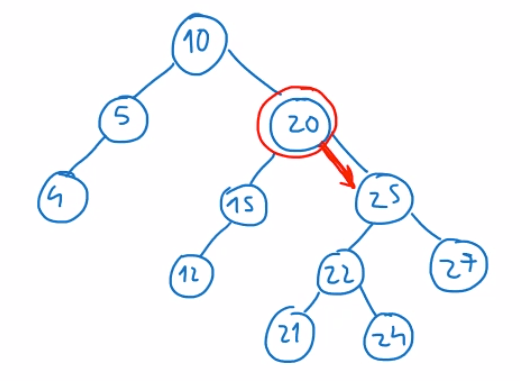

In [3]:
t = BST()
for n in (10, 5, 20, 4, 15, 25, 12, 22, 21, 24, 27):  
    t.insert(n)
    
print(binary_tree_string(t.root))

                              10
                       /              \
              5                               20
           /                               /      \
      4                               15              25
                                     /               /  \
                                  12              22      27
                                                  /\        
                                                21  24        


In [4]:
print(t.successor(t.find(20)).key)
print(t.successor(t.find(15)).key)
print(t.successor(t.find(12)).key)
print(t.successor(t.find(25)).key)
print(t.successor(t.find(4)).key)
print(t.successor(t.find(10)).key)
print(t.successor(t.find(27)))

21
20
15
27
5
12
None
